In [29]:
# from pyspark.sql import SparkSession
# import pyspark.pandas as ps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# spark = (
#     SparkSession.builder.appName("BNPL")
#     .config("spark.sql.repl.eagerEval.enabled", True) 
#     .config("spark.sql.parquet.cacheMetadata", "true")
#     .config("spark.driver.memory", "8g")
#     .getOrCreate()
# )

data_directory = "../data/"
tables_directory = data_directory + "tables/"
transactions_directory = tables_directory + "transactions_20210228_20210827_snapshot/"
merchants_file_loc = tables_directory + "tbl_merchants.parquet"

In [20]:
merchants = pd.read_parquet(merchants_file_loc)
transactions = pd.read_parquet(transactions_directory)
transactions = transactions.merge(merchants, how="left", on="merchant_abn")
transactions["order_datetime"] = pd.to_datetime(transactions["order_datetime"])
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3643266 entries, 0 to 3643265
Data columns (total 7 columns):
 #   Column          Dtype   
---  ------          -----   
 0   user_id         int64   
 1   merchant_abn    int64   
 2   dollar_value    float64 
 3   order_id        object  
 4   order_datetime  category
 5   name            object  
 6   tags            object  
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 201.5+ MB


In [21]:
transactions

,user_id,merchant_abn,dollar_value,order_id,order_datetime,name,tags
0,1,28000487688,133.226894,0c37b3f7-c7f1-48cb-bcc7-0a58e76608ea,2021-02-28,Sed Nunc Industries,"((books, periodicals, anD newspapers), (b), (t..."
1,18485,62191208634,79.131400,9e18b913-0465-4fd4-92fd-66d15e65d93c,2021-02-28,Cursus Non Egestas Foundation,"[(furniture, home furnishings and equipment sh..."
2,1,83690644458,30.441348,40a2ff69-ea34-4657-8429-df7ca957d6a1,2021-02-28,Id Erat Etiam Consulting,"[(gift, card, novelty, and souvenir shops), (b..."
3,18488,39649557865,962.813341,f4c1a5ae-5b76-40d0-ae0f-cb9730ac325a,2021-02-28,Arcu Morbi Institute,"([artist supply and craft shops], [c], [take r..."
4,2,80779820715,48.123977,cd09bdd6-f56d-489f-81ea-440f4bda933c,2021-02-28,Euismod Enim LLC,"([watch, clock, and jewelry repair shops], [b]..."
...,...,...,...,...,...,...,...
3643261,18470,29323795999,8.346682,f35299fa-c9f4-408e-bb86-b9d5fff65a9a,2021-08-27,NaN,NaN
3643262,18471,21359184622,97.760164,8ed0f865-9f70-4e20-8266-81904c95de89,2021-08-27,Sit Amet PC,"((motor vehicle supplies and new parts), (b), ..."
3643263,18472,21807339153,54.310599,3251ce95-a850-4fbc-98d0-32bce1651d40,2021-08-27,Praesent Eu LLP,"([digital goods: books, movies, music], [c], [..."
3643264,18475,41944909975,103.804012,bd52416a-a7f1-4293-ae96-cc4a8392e414,2021-08-27,Et Nunc Consulting,"([books, periodicals, and newspapers], [e], [t..."


In [22]:
transactions.count()

user_id           3643266
merchant_abn      3643266
dollar_value      3643266
order_id          3643266
order_datetime    3643266
name              3494038
tags              3494038
dtype: int64

Observe in the table above that we have different counts for 'name' and 'merchant_abn'. This leads us to believe that null values (or missing values) are observed in the dataset. 3643266 - 3494038 = 149228 rows of nulls. Let's confirm this with the following code:

In [23]:
transactions[transactions.isnull().any(axis=1)]

,user_id,merchant_abn,dollar_value,order_id,order_datetime,name,tags
6,3,29566626791,46.330872,26b7574e-81c2-4558-a7d1-017ea9d29440,2021-02-28,NaN,NaN
39,18512,75342681786,11.114536,bdd7bdb2-f5c6-47e6-81f8-4e8c0d9882d2,2021-02-28,NaN,NaN
51,18519,27130058170,914.106232,f0a2ad39-0b6f-4b22-a87f-0345ae4bb677,2021-02-28,NaN,NaN
54,29,29323795999,9.257938,e74e8f04-2fe3-44d4-b081-0ccf1e8aba69,2021-02-28,NaN,NaN
68,32,32234779638,15.485283,ed81cbe9-2474-45a8-895a-9189c3877e84,2021-02-28,NaN,NaN
...,...,...,...,...,...,...,...
3643225,18431,75342681786,19.955335,a1cec489-6aa8-4254-901c-50a9a9ef4d30,2021-08-27,NaN,NaN
3643232,18437,32234779638,78.371616,b9507b5c-a838-4fd4-befc-12b6a8a0e478,2021-08-27,NaN,NaN
3643245,18455,32234779638,14.372271,8260af91-769c-4a70-8718-05f67debdbc4,2021-08-27,NaN,NaN
3643254,18460,20562405782,250.924374,1642786c-97ea-4496-b3a3-a00dd9a1e5aa,2021-08-27,NaN,NaN


We have confirmed our suspicions. Notice how the nulls are predominantly related to the name of the merchant, and what they purchased ('tags'). At this preliminary stage, these can be considered vital features when ranking merchants, and if we lack this data, we hinder the accuracy of our selection metrics. Hence, we should remove these in further analysis.

In [24]:
transactions_noNull = transactions.dropna()
transactions_noNull

,user_id,merchant_abn,dollar_value,order_id,order_datetime,name,tags
0,1,28000487688,133.226894,0c37b3f7-c7f1-48cb-bcc7-0a58e76608ea,2021-02-28,Sed Nunc Industries,"((books, periodicals, anD newspapers), (b), (t..."
1,18485,62191208634,79.131400,9e18b913-0465-4fd4-92fd-66d15e65d93c,2021-02-28,Cursus Non Egestas Foundation,"[(furniture, home furnishings and equipment sh..."
2,1,83690644458,30.441348,40a2ff69-ea34-4657-8429-df7ca957d6a1,2021-02-28,Id Erat Etiam Consulting,"[(gift, card, novelty, and souvenir shops), (b..."
3,18488,39649557865,962.813341,f4c1a5ae-5b76-40d0-ae0f-cb9730ac325a,2021-02-28,Arcu Morbi Institute,"([artist supply and craft shops], [c], [take r..."
4,2,80779820715,48.123977,cd09bdd6-f56d-489f-81ea-440f4bda933c,2021-02-28,Euismod Enim LLC,"([watch, clock, and jewelry repair shops], [b]..."
...,...,...,...,...,...,...,...
3643260,18469,13514558491,615.370797,b84e4f6d-921d-455a-84b7-d27be8389526,2021-08-27,Magna Praesent PC,"[(motor vehicle supplies and new parts), (a), ..."
3643262,18471,21359184622,97.760164,8ed0f865-9f70-4e20-8266-81904c95de89,2021-08-27,Sit Amet PC,"((motor vehicle supplies and new parts), (b), ..."
3643263,18472,21807339153,54.310599,3251ce95-a850-4fbc-98d0-32bce1651d40,2021-08-27,Praesent Eu LLP,"([digital goods: books, movies, music], [c], [..."
3643264,18475,41944909975,103.804012,bd52416a-a7f1-4293-ae96-cc4a8392e414,2021-08-27,Et Nunc Consulting,"([books, periodicals, and newspapers], [e], [t..."


Let's examine outliers in this dataset without nulls

/Users/praneetmalaviya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dollar_value'>

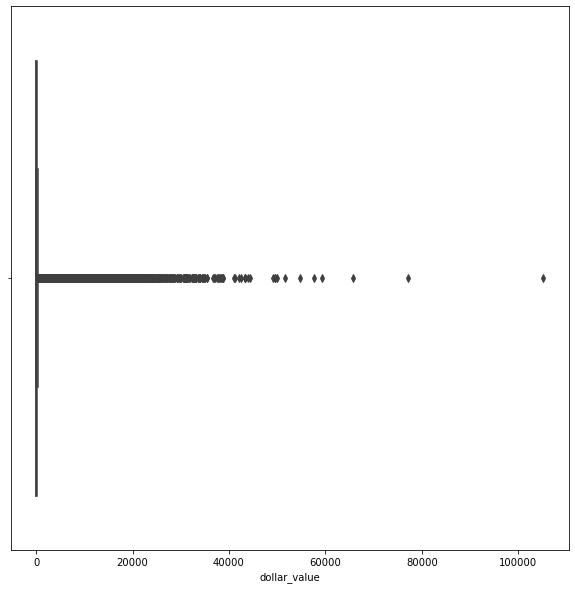

In [31]:
plt.figure(figsize=(10,10))
sns.boxplot(transactions_noNull['dollar_value'])

<AxesSubplot:>

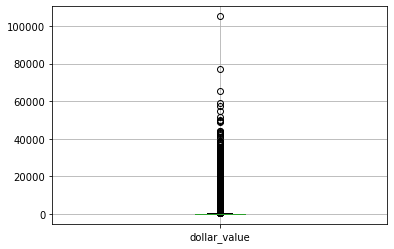

In [32]:
transactions_noNull.boxplot(column='dollar_value')

In [26]:
transactions_noNull.describe()

,user_id,merchant_abn,dollar_value
count,3.494038e+06,3.494038e+06,3.494038e+06
mean,1.203803e+04,5.585244e+10,1.586076e+02
std,6.951607e+03,2.523671e+10,4.676422e+02
min,1.000000e+00,1.002328e+10,9.756658e-08
25%,6.016000e+03,3.482263e+10,2.564831e+01
50%,1.203800e+04,5.679697e+10,6.091459e+01
75%,1.805400e+04,7.767908e+10,1.476516e+02
max,2.408100e+04,9.999054e+10,1.051939e+05


Some outliers are present, as seen in the box plot above. Lets examine which ones these are and if they're worth removing from the dataset, via an IQR method (notice the difference between 50th quantile and 75th quantile - huge, hence indicating that outliers are present).

In [33]:
dollar_value_Q3 = np.quantile(transactions_noNull['dollar_value'], 0.75)
dollar_value_Q1 = np.quantile(transactions_noNull['dollar_value'], 0.25)
IQR = dollar_value_Q3 - dollar_value_Q1
IQR

122.00327969572712

Applying basic statistical outlier removal:

In [37]:
dollar_value_Q3 + 1.5*IQR

330.65650645023425

In [39]:
dollar_value_Q1 - 1.5*IQR

-157.35661233267425

For the lower range, let's just remove all dollar value less than 0, as these don't make sense. 

The upper range, however, seems a bit low considering information the boxplots produced. Before deeming all values > $330 as outliers, let's view how many rows there are in this and if the majority of them do, indeed, look like outliers. 

In [40]:
transactions_noNull[transactions_noNull['dollar_value'] > 330.6]

,user_id,merchant_abn,dollar_value,order_id,order_datetime,name,tags
3,18488,39649557865,962.813341,f4c1a5ae-5b76-40d0-ae0f-cb9730ac325a,2021-02-28,Arcu Morbi Institute,"([artist supply and craft shops], [c], [take r..."
24,12,57757792876,1078.086899,77d56af2-4daf-4b8a-b80e-a0d556d33ac3,2021-02-28,Pretium Et LLC,"([stationery, office supplies and printing and..."
60,30,53402274399,1939.727820,28fb0d1e-3104-4a36-99af-f80936667e35,2021-02-28,Lorem Ltd,"[(lawn and garden supplY outlets, including nu..."
69,18531,82545351270,740.360911,f0d8d5b4-f533-4bdc-ad59-b9bfc05975d8,2021-02-28,Vel Inc.,"((telecom), (b), (take rate: 3.24))"
82,43,22027671078,370.314495,78ecfacd-7d35-4566-b343-e2259981af91,2021-02-28,Mauris Magna Industries,"((computer programming , data processing, and ..."
...,...,...,...,...,...,...,...
3643235,18441,22033359776,601.460694,456c44cd-1bce-41c9-89ea-f802915fed83,2021-08-27,Suspendisse Non Leo PC,"((motor vehicle supplies and new parts), (b), ..."
3643236,18443,34459028045,414.295719,d108ea44-0dde-434c-b919-b36e99550022,2021-08-27,Tellus Eu Inc.,"[[stationery, office supplies and printing an..."
3643242,18450,34179569263,648.543250,5684b528-43bd-4533-adcd-5a69b625719d,2021-08-27,Sodales At LLC,"[(music shops - musical instruments, pianos, a..."
3643243,18451,93349773784,400.360583,da5df92a-a928-4905-a6dc-83b913d5e313,2021-08-27,Facilisis Vitae LLC,"[(tent and awnIng shops), (b), (take rate: 4.51)]"


There are 377429 rows in this, which is ~11% of all rows (377429/3494038 * 100), a significant amount. 

Let's examine the tags (i.e, merchants' purchases) and observe if these greater dollar values are sensible.

In [58]:
current_outliers = transactions_noNull[transactions_noNull['dollar_value'] > 330.6]
current_outliers = current_outliers.loc[:, ['dollar_value', 'tags']]
current_outliers.to_csv('../data/curated/current_outliers.csv')

We have saved the dataframe, as it is easier to observe the 'tags' column.

Upon opening the current_outliers csv file, we have found that the majority purchases with a corresponding high dollar_value are purchases of expensive goods/services (i.e, pianos, rent, electronics, furniture etc.). To confirm this, let's view a sorted dataframe:

In [59]:
current_outliers.sort_values(by='dollar_value', ascending=False)

,dollar_value,tags
860206,105193.885789,"((antique shops - sales, repairs, and restorat..."
2950176,77134.214605,"[(antique shops - sales, repairs, and restorat..."
3607356,65660.033084,"((antique shops - sales, repairs, and restorat..."
3192049,59223.926571,"[[antique shops - sales, repairs, and restorat..."
231544,57541.595348,"((jewelry, watch, clock, and silverware shops)..."
...,...,...
1452204,330.606454,"[(artist supply and craft shops), (a), (take r..."
1938402,330.604251,"([computers, comPuter peripheral equipment, an..."
3528850,330.604037,"([health and beauty spas], [a], [take rate: 5...."
1318338,330.603849,"[(lawn and garden supply Outlets, including nu..."


Hence, we have determined that an upper range of $330 is insufficient for outlier removal. 